In [1]:
#Dependecies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import requests
from os import getcwd
from sklearn.metrics import roc_auc_score, r2_score


In [2]:
#data covid19 death

url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
df_covid19_death= pd.read_csv(url, error_bad_lines=False)
df_covid19_death.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20
261,NaN,Sao Tome and Principe,0.186400,6.613100,0,0,0,0,0,0,...,13,13,13,14,14,14,14,14,14,14
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,345,348,351,361,364,365,417,424,429,433
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
264,NaN,Tajikistan,38.861000,71.276100,0,0,0,0,0,0,...,53,53,54,54,55,55,55,55,56,56
265,NaN,Lesotho,-29.610000,28.233600,0,0,0,0,0,0,...,0,0,0,1,1,1,2,3,3,3


In [3]:
#columns name
list(df_covid19_death.columns)

['Province/State',
 'Country/Region',
 'Lat',
 'Long',
 '1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20',
 '2/1/20',
 '2/2/20',
 '2/3/20',
 '2/4/20',
 '2/5/20',
 '2/6/20',
 '2/7/20',
 '2/8/20',
 '2/9/20',
 '2/10/20',
 '2/11/20',
 '2/12/20',
 '2/13/20',
 '2/14/20',
 '2/15/20',
 '2/16/20',
 '2/17/20',
 '2/18/20',
 '2/19/20',
 '2/20/20',
 '2/21/20',
 '2/22/20',
 '2/23/20',
 '2/24/20',
 '2/25/20',
 '2/26/20',
 '2/27/20',
 '2/28/20',
 '2/29/20',
 '3/1/20',
 '3/2/20',
 '3/3/20',
 '3/4/20',
 '3/5/20',
 '3/6/20',
 '3/7/20',
 '3/8/20',
 '3/9/20',
 '3/10/20',
 '3/11/20',
 '3/12/20',
 '3/13/20',
 '3/14/20',
 '3/15/20',
 '3/16/20',
 '3/17/20',
 '3/18/20',
 '3/19/20',
 '3/20/20',
 '3/21/20',
 '3/22/20',
 '3/23/20',
 '3/24/20',
 '3/25/20',
 '3/26/20',
 '3/27/20',
 '3/28/20',
 '3/29/20',
 '3/30/20',
 '3/31/20',
 '4/1/20',
 '4/2/20',
 '4/3/20',
 '4/4/20',
 '4/5/20',
 '4/6/20',
 '4/7/20',
 '4/8/20',
 '4/9/20',
 '4/10/20',
 '4/11/20',


In [4]:
# droping columns
df_covid19_death=df_covid19_death.drop(['Lat', 'Long'], axis=1)


In [5]:
# transpose dataFrame and replace columns
df_covid19_death=df_covid19_death.T
columns_to_change={}
columns_province=df_covid19_death[0:1].values[0]
columns_country=df_covid19_death[1:2].values[0]
for c in df_covid19_death[0:1].columns.values:
    if str(columns_province[int(c)])!='nan':
           columns_to_change[c]=str(columns_country[int(c)])+'-' + str(columns_province[int(c)])
    else:
          columns_to_change[c]=str(columns_country[int(c)])


df_covid19_death=df_covid19_death.rename(columns=columns_to_change)
df_covid19_death=df_covid19_death.drop(['Province/State', 'Country/Region'])
df_covid19_death.index=pd.to_datetime(df_covid19_death.index)

df_covid19_death.head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia-Australian Capital Territory,Australia-New South Wales,...,Malawi,United Kingdom-Falkland Islands (Malvinas),France-Saint Pierre and Miquelon,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan,Lesotho
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#data covid19 test
url_test="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df_covid19_test= pd.read_csv(url_test, error_bad_lines=False)


df_covid19_test.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,33190,33384,33594,33908,34194,34366,34451,34455,34740,34994
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2964,3038,3106,3188,3278,3371,3454,3571,3667,3752
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,16404,16879,17348,17808,18242,18712,19195,19689,20216,20770
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,855,855,855,855,855,855,855,858,861,862
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,346,386,386,396,458,462,506,525,541,576


In [7]:
# droping columns
df_covid19_test=df_covid19_test.drop(['Lat', 'Long'], axis=1)

In [8]:
# transpose dataFrame and replace columns
df_covid19_test=df_covid19_test.T
columns_to_replace={}
c_province=df_covid19_test[0:1].values[0]
c_countries=df_covid19_test[1:2].values[0]
for c in df_covid19_test[0:1].columns.values:
    if str(c_province[int(c)])!='nan':
           columns_to_replace[c]=str(c_countries[int(c)])+'-' + str(c_province[int(c)])
    else:
           columns_to_replace[c]=str(c_countries[int(c)])
# columns_to_replace

df_covid19_test=df_covid19_test.rename(columns=columns_to_replace)
df_covid19_test=df_covid19_test.drop(['Province/State', 'Country/Region'])
df_covid19_test.index=pd.to_datetime(df_covid19_test.index)

df_covid19_test.head()


,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia-Australian Capital Territory,Australia-New South Wales,...,Malawi,United Kingdom-Falkland Islands (Malvinas),France-Saint Pierre and Miquelon,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan,Lesotho
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#data covid19 recovered
url_recovered="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
df_covid19_recovered= pd.read_csv(url_recovered, error_bad_lines=False)
df_covid19_recovered.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20
248,NaN,Sao Tome and Principe,0.186400,6.613100,0,0,0,0,0,0,...,269,279,283,283,284,284,286,286,286,322
249,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,575,591,595,619,630,642,659,675,685,694
250,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,266,266,272,272,272,296,296,296,302,302
251,NaN,Tajikistan,38.861000,71.276100,0,0,0,0,0,0,...,4914,4965,5011,5067,5115,5176,5228,5278,5332,5383
252,NaN,Lesotho,-29.610000,28.233600,0,0,0,0,0,0,...,11,11,11,20,26,26,32,33,48,48


In [10]:
# droping columns
df_covid19_recovered=df_covid19_recovered.drop(['Lat', 'Long'], axis=1)

In [11]:
# transpose dataFrame and replace columns
df_covid19_recovered=df_covid19_recovered.T
columns_to_change={}
c_province=df_covid19_recovered[0:1].values[0]
c_country=df_covid19_recovered[1:2].values[0]
for c in df_covid19_recovered[0:1].columns.values:
    if str(c_province[int(c)])!='nan':
           columns_to_replace[c]=str(c_countries[int(c)])+'-' + str(c_province[int(c)])
    else:
           columns_to_replace[c]=str(c_countries[int(c)])
# columns_to_replace

df_covid19_recovered=df_covid19_recovered.rename(columns=columns_to_replace)
df_covid19_recovered=df_covid19_recovered.drop(['Province/State', 'Country/Region'])
df_covid19_recovered.index=pd.to_datetime(df_covid19_recovered.index)

df_covid19_test.head()


,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia-Australian Capital Territory,Australia-New South Wales,...,Malawi,United Kingdom-Falkland Islands (Malvinas),France-Saint Pierre and Miquelon,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan,Lesotho
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#Population Dataframe

url = 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population'
# The table we're interested in is the first one read in from the webpage.
df = pd.read_html(url)[0]

df.head()


,Rank,Country (or dependent territory),Population,% of worldpopulation,Date,Source
0,1,China[b],1403554760,NaN,16 Jul 2020,National population clock[3]
1,2,India[c],1364764203,NaN,16 Jul 2020,National population clock[4]
2,3,United States[d],329963086,NaN,16 Jul 2020,National population clock[5]
3,4,Indonesia,269603400,NaN,1 Jul 2020,National annual projection[6]
4,5,Pakistan[e],220892331,NaN,1 Jul 2020,UN Projection[2]


In [13]:
# Rename the relevant column to something more manageable.
df.rename(columns={'Country (or dependent territory)': 'Country'}, inplace=True)
# Get rid of the footnote indicators, "[a]", "[b]", etc.
df['Country'] = df['Country'].str.replace('\[\w\]', '')
df.head()


,Rank,Country,Population,% of worldpopulation,Date,Source
0,1,China,1403554760,NaN,16 Jul 2020,National population clock[3]
1,2,India,1364764203,NaN,16 Jul 2020,National population clock[4]
2,3,United States,329963086,NaN,16 Jul 2020,National population clock[5]
3,4,Indonesia,269603400,NaN,1 Jul 2020,National annual projection[6]
4,5,Pakistan,220892331,NaN,1 Jul 2020,UN Projection[2]


In [14]:
# Set the 'Country' column to be the index.
df.index = df['Country']
df['date']=pd.to_datetime(df.Date)
df.drop(columns=['Rank','% of worldpopulation','Source','Date'],inplace=True)
df.head()


,Country,Population,date
Country,,,
China,China,1403554760,2020-07-16
India,India,1364764203,2020-07-16
United States,United States,329963086,2020-07-16
Indonesia,Indonesia,269603400,2020-07-01
Pakistan,Pakistan,220892331,2020-07-01


In [15]:
#select data from this year

populationBycountry=df[df['date']>'2020-1-1']
populationBycountry.head()


,Country,Population,date
Country,,,
China,China,1403554760,2020-07-16
India,India,1364764203,2020-07-16
United States,United States,329963086,2020-07-16
Indonesia,Indonesia,269603400,2020-07-01
Pakistan,Pakistan,220892331,2020-07-01


In [16]:
# new data frame to model
Country=['US','Brazil','Colombia','Venezuela']
covid19_death_bycountry=df_covid19_death[Country].copy()
covid19_death_bycountry.rename(columns={'US': 'US_Death'}, inplace=True)
covid19_death_bycountry.rename(columns={'Brazil': 'Brazil_Death'}, inplace=True)
covid19_death_bycountry.rename(columns={'Colombia': 'Colombia_Death'}, inplace=True)
covid19_death_bycountry.rename(columns={'Venezuela': 'Venezuela_Death'}, inplace=True)
covid19_death_bycountry.tail()


,US_Death,Brazil_Death,Colombia_Death,Venezuela_Death
2020-07-11,134777,71469,5202,85
2020-07-12,135205,72100,5426,89
2020-07-13,135566,72833,5634,93
2020-07-14,136466,74133,5787,96
2020-07-15,137407,75366,5969,100


In [17]:
covid19_test_bycountry=df_covid19_test[Country].copy()
covid19_test_bycountry.rename(columns={'US': 'US_Test'}, inplace=True)
covid19_test_bycountry.rename(columns={'Brazil': 'Brazil_Test'}, inplace=True)
covid19_test_bycountry.rename(columns={'Colombia': 'Colombia_Test'}, inplace=True)
covid19_test_bycountry.rename(columns={'Venezuela': 'Venezuela_Test'}, inplace=True)
covid19_test_bycountry.tail()


,US_Test,Brazil_Test,Colombia_Test,Venezuela_Test
2020-07-11,3245925,1839850,140776,9178
2020-07-12,3304942,1864681,145362,9465
2020-07-13,3364157,1884967,150445,9707
2020-07-14,3431574,1926824,154277,10010
2020-07-15,3497847,1966748,159898,10428


In [18]:
covid19_recovered_bycountry=df_covid19_recovered[Country].copy()
covid19_recovered_bycountry.rename(columns={'US': 'US_recovered'}, inplace=True)
covid19_recovered_bycountry.rename(columns={'Brazil': 'Brazil_recovered'}, inplace=True)
covid19_recovered_bycountry.rename(columns={'Colombia': 'Colombia_recovered'}, inplace=True)
covid19_recovered_bycountry.rename(columns={'Venezuela': 'Venezuela_recovered'}, inplace=True)
covid19_recovered_bycountry.tail()


,US_recovered,Brazil_recovered,Colombia_recovered,Venezuela_recovered
2020-07-11,995576,3078,8227,2671
2020-07-12,1006326,3115,8247,2671
2020-07-13,1031939,3179,8373,2671
2020-07-14,1049098,3179,8441,2671
2020-07-15,1075882,3335,8507,3050


In [19]:
#creading Dataframe to model

covid19_model_Df=pd.concat([covid19_test_bycountry, covid19_death_bycountry,covid19_recovered_bycountry], axis=1)
covid19_model_Df = covid19_model_Df.apply (pd.to_numeric, errors='coerce')
#covid19_model_Df = covid19_model_Df.dropna()
covid19_model_Df.head()

,US_Test,Brazil_Test,Colombia_Test,Venezuela_Test,US_Death,Brazil_Death,Colombia_Death,Venezuela_Death,US_recovered,Brazil_recovered,Colombia_recovered,Venezuela_recovered
2020-01-22,1,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,1,0,0,0,0,0,0,0,0,0,0,0
2020-01-24,2,0,0,0,0,0,0,0,0,0,0,0
2020-01-25,2,0,0,0,0,0,0,0,0,0,0,0
2020-01-26,5,0,0,0,0,0,0,0,0,0,0,0


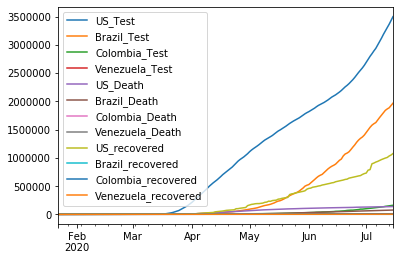

In [20]:
covid19_model_Df.plot()

## Polynomial regression model

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score


#import wget
import os

import datetime

## USA

In [22]:
Df1=covid19_model_Df.copy()
Df1=Df1.reset_index(drop=True)
Df1['TP']=Df1.index

In [23]:
country_sel=['US']

In [24]:
Df1_C=Df1[['TP',country_sel[0]+'_Test']]
Df1_C

,TP,US_Test
0,0,1
1,1,1
2,2,2
3,3,2
4,4,5
...,...,...
171,171,3245925
172,172,3304942
173,173,3364157
174,174,3431574


In [25]:
X=Df1_C['TP']
y=Df1_C.iloc[:,1:2]

In [26]:
X_train=X[:80]
X_test=X[80:]
y_train=y[:80]
y_test=y[80:]

In [27]:
X_test.min()

80

In [28]:
X_train=[(1,i) for i in range(X_train.min(),X_train.max()+1)]

In [29]:
X_test=[(1,i) for i in range(X_test.min(),X_test.max()+1)]

In [30]:
len(X_train)

80

In [31]:
len(y_train)

80

In [32]:
degree=1

In [33]:
def train_model(X_train, y_train, degree):
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(X_train)

    model = LinearRegression()
    model.fit(x_poly, y_train)
    return model


In [34]:
# Model predictions
def get_predictions(X_test, model, degree):
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(X_test)
    return model.predict(x_poly)
    

In [35]:
# enter data here
model_poly=train_model(X_train,y_train,2)

In [36]:
y_pred=get_predictions(X_test,model_poly,2)

In [37]:
y_pred

array([[ 375383.27911392],
       [ 391661.37240975],
       [ 408248.20278721],
       [ 425143.7702463 ],
       [ 442348.07478703],
       [ 459861.11640939],
       [ 477682.89511338],
       [ 495813.410899  ],
       [ 514252.66376625],
       [ 533000.65371514],
       [ 552057.38074566],
       [ 571422.84485781],
       [ 591097.04605159],
       [ 611079.98432701],
       [ 631371.65968406],
       [ 651972.07212274],
       [ 672881.22164305],
       [ 694099.108245  ],
       [ 715625.73192858],
       [ 737461.09269379],
       [ 759605.19054063],
       [ 782058.02546911],
       [ 804819.59747922],
       [ 827889.90657096],
       [ 851268.95274433],
       [ 874956.73599934],
       [ 898953.25633597],
       [ 923258.51375424],
       [ 947872.50825415],
       [ 972795.23983568],
       [ 998026.70849885],
       [1023566.91424365],
       [1049415.85707008],
       [1075573.53697815],
       [1102039.95396785],
       [1128815.10803917],
       [1155898.99919214],
 

In [38]:
covid_model_df_test=pd.DataFrame({
    "y_test":y_test.values.ravel(),
    "y_pred":y_pred.ravel()
})
covid_model_df_test.head()

,y_test,y_pred
0,527969,375383.279114
1,556522,391661.372410
2,581813,408248.202787
3,608878,425143.770246
4,637974,442348.074787


In [39]:
r2_score(y_test,y_pred)

0.9090723292419018

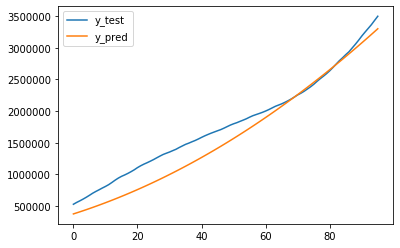

In [40]:
covid_model_df_test.plot()


## Brazil

In [41]:
country_sel=['Brazil']

In [42]:
Df1_C=Df1[['TP',country_sel[0]+'_Test']]
Df1_C

,TP,Brazil_Test
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
171,171,1839850
172,172,1864681
173,173,1884967
174,174,1926824


In [43]:
X=Df1_C['TP']
y=Df1_C.iloc[:,1:2]

In [44]:
X_train=X[:80]
X_test=X[80:]
y_train=y[:80]
y_test=y[80:]

In [45]:
X_train=[(1,i) for i in range(X_train.min(),X_train.max()+1)]

In [46]:
X_test=[(1,i) for i in range(X_test.min(),X_test.max()+1)]

In [47]:
degree=1

In [48]:
def train_model(X_train, y_train, degree):
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(X_train)

    model = LinearRegression()
    model.fit(x_poly, y_train)
    return model

In [49]:
# Model predictions
def get_predictions(X_test, model, degree):
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(X_test)
    return model.predict(x_poly)
    

In [50]:
# enter data here
model_poly=train_model(X_train,y_train,4)

In [51]:
y_pred=get_predictions(X_test,model_poly,4)

In [52]:
covid_model_df_test=pd.DataFrame({
    "y_test":y_test.values.ravel(),
    "y_pred":y_pred.ravel()
})
covid_model_df_test.head()

,y_test,y_pred
0,20727,20955.814459
1,22192,22942.101588
2,23430,25058.395807
3,25262,27309.963665
4,28320,29702.171676


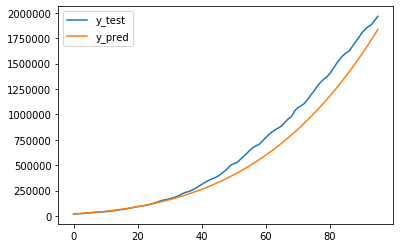

In [53]:
covid_model_df_test.plot()


In [54]:
r2_score(y_test,y_pred)

0.9499185485224981

### Colombia

In [55]:
country_sel=['Colombia']

In [56]:
Df1_C=Df1[['TP',country_sel[0]+'_Test']]
Df1_C

,TP,Colombia_Test
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
171,171,140776
172,172,145362
173,173,150445
174,174,154277


In [57]:
X=Df1_C['TP']
y=Df1_C.iloc[:,1:2]

In [58]:
X_train=X[:80]
X_test=X[80:]
y_train=y[:80]
y_test=y[80:]

In [59]:
X_train=[(1,i) for i in range(X_train.min(),X_train.max()+1)]

In [60]:
X_test=[(1,i) for i in range(X_test.min(),X_test.max()+1)]

In [61]:
def train_model(X_train, y_train, degree):
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(X_train)

    model = LinearRegression()
    model.fit(x_poly, y_train)
    return model

In [62]:
# Model predictions
def get_predictions(X_test, model, degree):
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(X_test)
    return model.predict(x_poly)

In [63]:
# enter data here
model_poly=train_model(X_train,y_train,4)

In [64]:
y_pred=get_predictions(X_test,model_poly,4)

In [65]:
covid_model_df_test=pd.DataFrame({
    "y_test":y_test.values.ravel(),
    "y_pred":y_pred.ravel()
})
covid_model_df_test.head()

,y_test,y_pred
0,2709,2627.951601
1,2776,2854.838694
2,2852,3095.460444
3,2979,3350.338812
4,3105,3620.005163


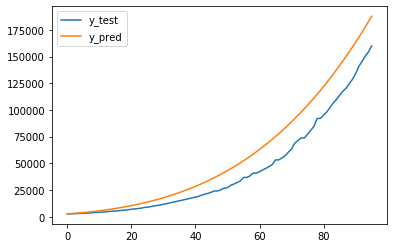

In [66]:
covid_model_df_test.plot()

In [67]:
r2_score(y_test,y_pred)

0.8361934966543151